# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#city_results = []
#Index_cities=[]

City_Number = []
City_Name = []
City_Lat = []
City_Lng = []
City_MaxTemp = []
City_Humidity = []
City_Cloudiness = []
City_WindSpeed = []
City_Country = []
City_Date = []
Count_Record = 0
#for city in cities:   

weather_api_key= "a160fd00bbc7c7caddb54e2757ff85b2"
city_ejempo=['London','Melbourne', 'Alaska','Jazan','Caracas', 'El Junquito', 'New Orleans', "GTY77", "Maracay", "Washington", "Pensilvanya", "Palita", "guarenas", "Atlanta", "Bogota"]

for city in city_ejempo:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #print(url) 
    Req_weather_city = requests.get(url).json()
    if (Req_weather_city["cod"]==200):
        Count_Record = Count_Record + 1
        City_Name.append(Req_weather_city['name'])
        City_Lat.append(Req_weather_city['coord']['lat'])
        City_Lng.append(Req_weather_city['coord']['lon'])
        City_MaxTemp.append(Req_weather_city['main']['temp'])
        City_Humidity.append(Req_weather_city['main']['humidity'])
        City_Cloudiness.append(Req_weather_city['clouds']['all'])
        City_WindSpeed.append(Req_weather_city['wind']['speed'])
        City_Country.append(Req_weather_city['sys']['country'])
        City_Date.append(Req_weather_city['dt'])
        print(f"Processing Record {Count_Record} of Set 1 | {city}")
    else: 
        #{"cod":"404","message":"city not found"}
        print(f"{city}: {Req_weather_city['message']}. Skipping...")

weather_dict = {
    "City": City_Name,
    "Lat": City_Lat,
    "Lng":City_Lng,
    "Temp": City_MaxTemp,
    "Humidity":City_Humidity,
    "Cloudiness":City_Cloudiness,
    "WindSpeed":City_WindSpeed,
    "Country":City_Country,
    "Date":City_Date 
}
meteorology_cities = pd.DataFrame(weather_dict)


Processing Record 1 of Set 1 | London
Processing Record 2 of Set 1 | Melbourne
Processing Record 3 of Set 1 | Alaska
Processing Record 4 of Set 1 | Jazan
Processing Record 5 of Set 1 | Caracas
Processing Record 6 of Set 1 | El Junquito
Processing Record 7 of Set 1 | New Orleans
GTY77: city not found. Skipping...
Processing Record 8 of Set 1 | Maracay
Processing Record 9 of Set 1 | Washington
Processing Record 10 of Set 1 | Pensilvanya
Palita: city not found. Skipping...
Processing Record 11 of Set 1 | guarenas
Processing Record 12 of Set 1 | Atlanta
Processing Record 13 of Set 1 | Bogota


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Export the city data into a .csv.
meteorology_cities.to_csv("output_data/meteorology_of_cities.csv", index=False, header=True)
# Display the DataFrame
for date_ in meteorology_cities['Date']:
    meteorology_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
meteorology_cities

,City,Lat,Lng,Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,London,51.5085,-0.1257,41.50,93,20,4.61,GB,02/05/2021
1,Melbourne,28.0836,-80.6081,59.52,72,1,4.61,US,02/05/2021
2,Alaska,64.0003,-150.0003,-19.03,89,100,1.70,US,02/05/2021
3,Jazan,36.2105,54.3928,49.87,56,100,6.49,IR,02/05/2021
4,Caracas,10.4880,-66.8792,71.56,78,20,2.98,VE,02/05/2021
5,El Junquito,10.4614,-67.0806,72.73,78,20,3.94,VE,02/05/2021
6,New Orleans,29.9547,-90.0751,50.50,66,90,9.22,US,02/05/2021
7,Maracay,10.2469,-67.5958,71.46,80,100,2.80,VE,02/05/2021
8,Washington,47.5001,-120.5015,38.80,53,1,11.50,US,02/05/2021
9,Pennsylvania,40.2724,-76.9057,33.87,44,75,5.75,US,02/05/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
Weather_cities_statistic = meteorology_cities.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Weather_cities_statistic

,Lat,Lng,Temp,Humidity,Cloudiness,WindSpeed
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,29.04250,-68.496577,48.924615,73.153846,45.230769,4.656154
std,18.82738,50.082860,24.793657,15.301667,41.162592,2.974535
min,4.60970,-150.000300,-19.030000,44.000000,1.000000,1.680000
25%,10.46740,-84.388000,39.160000,66.000000,20.000000,2.800000
50%,29.95470,-74.081700,50.500000,78.000000,20.000000,3.940000
75%,40.27240,-66.879200,71.460000,80.000000,90.000000,5.750000
max,64.00030,54.392800,72.730000,94.000000,100.000000,11.500000


In [58]:
#  Get the indices of cities that have humidity over 100%
#city_Hum100 =  meteorology_cities.index[meteorology_cities['Humidity'] >= 100 ].tolist()
city_Hum100 = meteorology_cities[(meteorology_cities['Humidity'] >= 100)]
a = 5
b=10
if len(city_Hum100) == 0:
    
    clean_city_data = meteorology_cities.copy()
    print(f"Skip this step if there are no cities that have humidity > 100%.")
    print(city_Hum100.index)
else:
    clean_city_data = meteorology_cities[(meteorology_cities['Humidity'] < 100)]
    clean_city_data_statistic = clean_city_data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
    print(f"Indices of cities that have humidity over 100%.: {city_Hum100.index}")
    print(f"=========================================================================")
    print(f"{clean_city_data_statistic}")

Skip this step if there are no cities that have humidity > 100%.
Int64Index([], dtype='int64')


In [61]:
#which we call "clean_city_data"
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,London,51.5085,-0.1257,41.50,93,20,4.61,GB,02/05/2021
1,Melbourne,28.0836,-80.6081,59.52,72,1,4.61,US,02/05/2021
2,Alaska,64.0003,-150.0003,-19.03,89,100,1.70,US,02/05/2021
3,Jazan,36.2105,54.3928,49.87,56,100,6.49,IR,02/05/2021
4,Caracas,10.4880,-66.8792,71.56,78,20,2.98,VE,02/05/2021
5,El Junquito,10.4614,-67.0806,72.73,78,20,3.94,VE,02/05/2021
6,New Orleans,29.9547,-90.0751,50.50,66,90,9.22,US,02/05/2021
7,Maracay,10.2469,-67.5958,71.46,80,100,2.80,VE,02/05/2021
8,Washington,47.5001,-120.5015,38.80,53,1,11.50,US,02/05/2021
9,Pennsylvania,40.2724,-76.9057,33.87,44,75,5.75,US,02/05/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

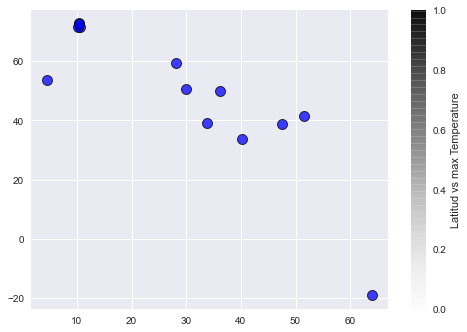

In [63]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Temp']
plt.scatter(x,y, s=100, c='blue', edgecolor='black', linewidth=1, alpha=0.75);
cbar= plt.colorbar()
cbar.set_label('Latitud vs max Temperature')

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression